## Now that we have cleaned data, we may start our data visualisations and try to capture any relations between differnet factors or any patterns in the members profiles to gain insight in the dating industry!  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tcr
import seaborn as sns

In [2]:
#Importing the clean data
data=pd.read_csv(r"D:\WORK\Personal Projects\OK Cupid\Cleaned_Data.csv")
data.head(3)

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75,-1,transportation,"south san francisco, california","dosen't have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,white,70,80000,hospitality / travel,"oakland, california","dosen't have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,No Response Given,graduated from masters program,No Response Given,68,-1,No Response Given,"san francisco, california",No Response Given,straight,has cats,No Response Given,m,pisces but it dosen't matter,no,"english, french, c++",available


# 1. Lets see how old are the members of this site

In [3]:
Age_data = pd.DataFrame(data.groupby("age").size().reset_index().rename(columns={0:"age_count"}))
Age_data.head()

,age,age_count
0,18,309
1,19,611
2,20,953
3,21,1282
4,22,1934


In [4]:
bins = [17,19, 29, 39, 49, 59, 69, np.inf]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
Age_data["range"] = pd.cut(Age_data.age, bins=bins, labels=labels)

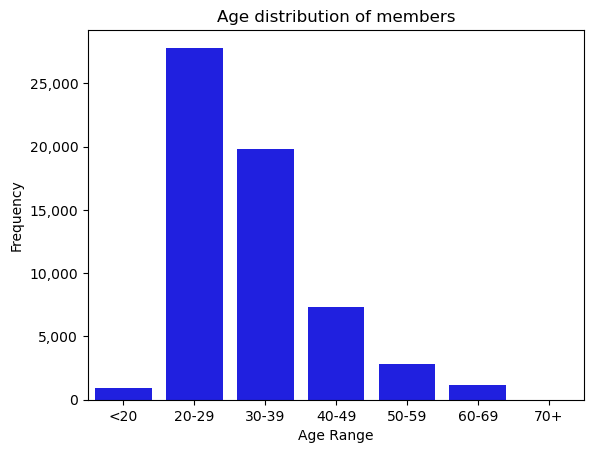

In [5]:
x=sns.barplot(x=Age_data.groupby("range").age_count.sum().index, y=Age_data.groupby("range").age_count.sum().values, color="blue")

# def comma(x, pos): 
#     return format(x, ",.0f")

x.yaxis.set_major_formatter(tcr.FuncFormatter(lambda x,p: format(x,",.0f")))
plt.title("Age distribution of members")
plt.xlabel("Age Range")
plt.ylabel("Frequency")
plt.show()

* The data shows a peak towards left side indicating majority of the members are in the younger age category. The age ranges from 18 to 110!
* The majority of the members are from the age bracket 20-30, but the mean age is still coming as 32 because of the range of age is as high as 110.

# 2. What is the body shape profiles of the members

   ## Height of the members

In [6]:
height_table = pd.DataFrame(data.groupby("height").size().reset_index().rename(columns={0:"height_count"}))
height_table.sort_values(by="height")
bins=[0,49,59,69,79,np.inf]
labels=["<50","50-59","60-69","70-79","80+"]

In [7]:
height_table["range"]=pd.cut(height_table.height, bins=bins, labels=labels)
height_table.groupby("range").height_count.sum()

range
<50         27
50-59      308
60-69    35297
70-79    24209
80+        105
Name: height_count, dtype: int64

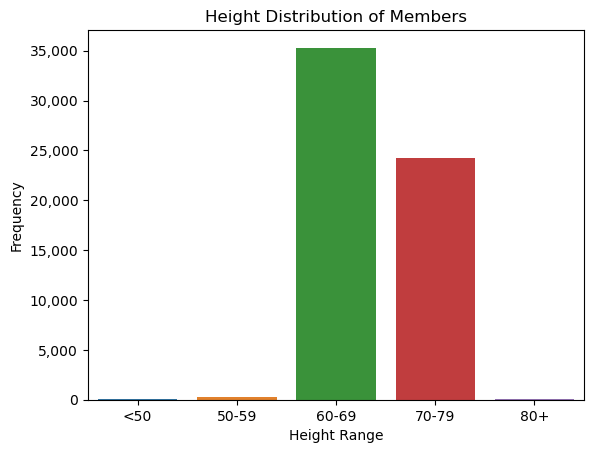

In [8]:

x=sns.barplot(x=height_table.groupby("range").height_count.sum().index, y=height_table.groupby("range").height_count.sum().values)
x.yaxis.set_major_formatter(lambda x,p: format(x,",.0f"))
plt.title("Height Distribution of Members")
plt.xlabel("Height Range")
plt.ylabel("Frequency")
plt.show()

## Body Type of the members

In [9]:
body = data.groupby('body_type').size().sort_values(ascending = False).to_frame().reset_index().rename(columns = \
                                                                                                    {0: 'body_type_count'})
body

,body_type,body_type_count
0,average,14652
1,fit,12711
2,athletic,11819
3,No Response Given,5296
4,thin,4711
5,curvy,3924
6,a little extra,2629
7,skinny,1777
8,full figured,1009
9,overweight,444


In [10]:
body.replace(to_replace="No Response Given",value="rather not say", inplace=True)

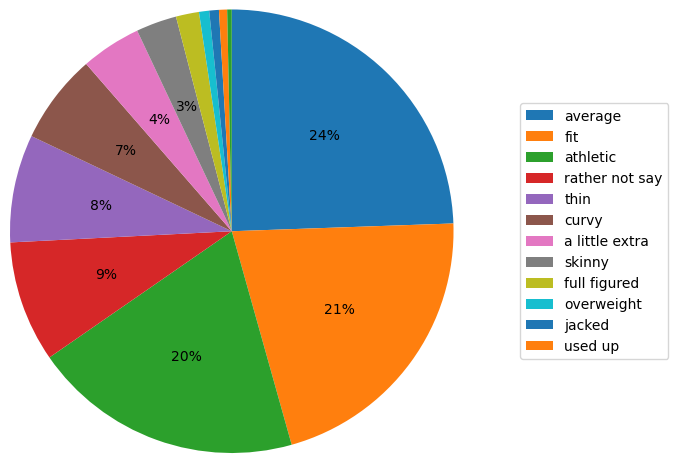

In [11]:
values = ['average', 'fit', 'athletic', 'rather not say', 'thin', 'curvy',
       'a little extra', 'skinny', 'full figured', 'overweight', 'jacked',
       'used up']

plt.pie(body['body_type_count'],startangle=-270,autopct= lambda x: '%.0f%%'  % x if x>2 else"", radius=1.5, counterclock=False)
plt.legend(labels=values, loc="center right",bbox_to_anchor = (1.7, 0.5))

plt.show()

* The height of the members lie in the bracket of 60-69 inches, following normal distribution.
* The major body type of the members was checked as 'Average', followed by Fit ans Athletic. Although about 9% of the population chose not to mention their body type.

# 3. Smoking and Drinking patterns of the members

## Smoking Patterns

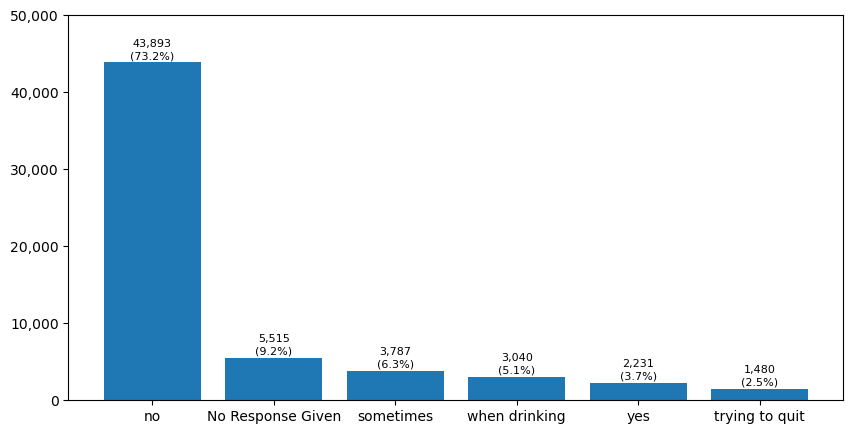

In [12]:
plt.figure(figsize=(10,5))
ax = plt.subplot()

x=plt.bar(data["smokes"].value_counts().index, data["smokes"].value_counts().values )
for bar in x:
    yval = bar.get_height()
    #the '{:,}' command adds a thousand separator to the labels
    ax.annotate('{:,}'.format(yval),
    xy = (bar.get_x() + bar.get_width() / 2, yval),
    #shows label position on x and y axis
    xytext = (0, 10), 
    textcoords = 'offset points',ha = 'center', va = 'bottom', fontsize = 8)
    
    perc = (yval/data.drinks.count())*100
    ax.annotate("({:.1f}%)".format(perc), xy = (bar.get_x() + bar.get_width() / 2, yval),
    xytext=(0, 1),textcoords = 'offset points',ha = 'center', va = 'bottom', fontsize = 8)


ax.yaxis.set_major_formatter(lambda x,p: format(x,",.0f"))
ax.set_ylim(0, 50000)
plt.show()

## Drinking Patterns

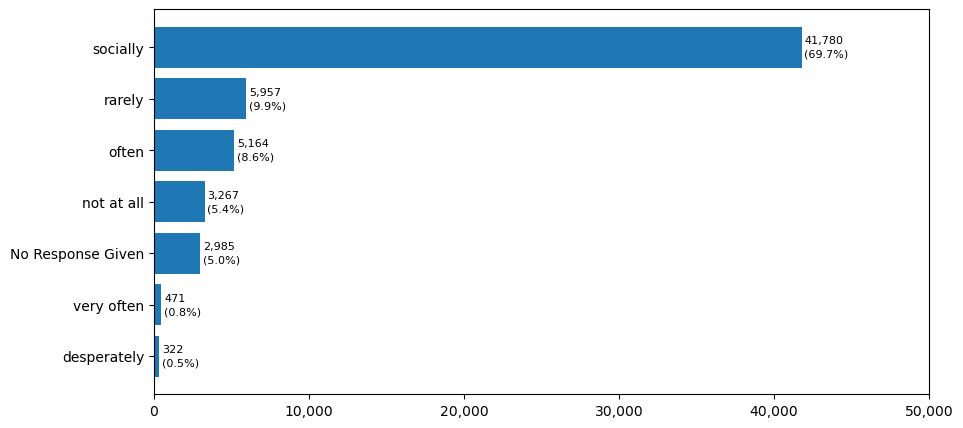

In [13]:
plt.figure(figsize=(10,5))
ax = plt.subplot()

x=plt.barh(data["drinks"].value_counts().sort_values().index, data["drinks"].value_counts().sort_values().values)
ax.xaxis.set_major_formatter(lambda x,p: format(x,",.0f"))

for bar in x:
    xval = bar.get_width()
    #the '{:,}' command adds a thousand separator to the labels
    ax.annotate('{:,}'.format(xval),
    xy = (xval,bar.get_y() + bar.get_height()/ 1.5),
    #shows label position on x and y axis
    xytext = (2, 0), 
    textcoords = 'offset points',ha = 'left', va = 'center', fontsize = 8)
    
    perc = (xval/data.drinks.count())*100
    ax.annotate("({:.1f}%)".format(perc), xy = (xval,bar.get_y() + bar.get_height() / 3),
    xytext=(2, 0),textcoords = 'offset points',ha = 'left', va = 'center', fontsize = 8)
    
ax.set_xlim(0, 50000)
plt.show()

* Most of the members drink socially and do not smoke. 
* There are 0.5% of the members that drink desperately.
* 3.7% of the members that admit that they smoke and if combined by "sometimes", "when drinking" and "trying to quit", it constitutes to approx 17% of the members.

# 4. Drugs consuming patterns of the members

In [14]:
dr = data.drugs.value_counts().sort_values(ascending=False).to_frame().reset_index()

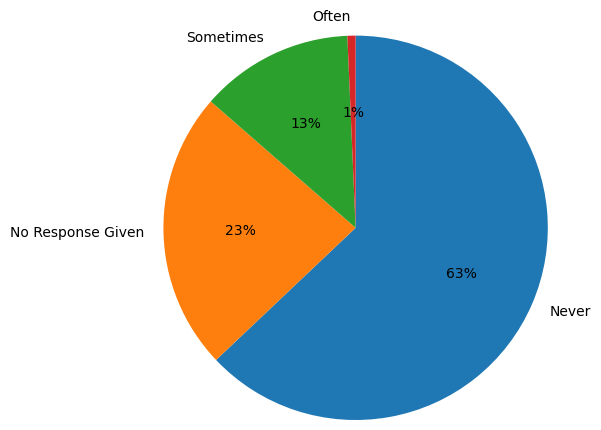

In [15]:
lable=['Never', 'No Response Given', 'Sometimes', 'Often']
plt.pie(dr["drugs"],labels=lable, startangle=-270, counterclock=False, autopct="%.0f%%", radius=1.3)
plt.show()

* 63% of the members do not consume drugs but arund 14% of them admits on consuming "Sometimes" or "Often".
* 23% chose not to answer, maybe fearing of judgement.

# 5. Education patterns of the members

In [16]:
education=data.groupby("education").education.count().sort_values(ascending=False).to_frame().rename(columns={"education":"count"}).reset_index()

In [17]:
#Creating an extra column to group these similar educations using a dictionary method
education_dictionary = {'graduated from college/university': 'Graduated - higher education',
                       'graduated from masters program': 'Graduated - higher education',
                       'no response given': 'No response',
                       'working on college/university': 'Studying - higher education',
                       'working on masters program': 'Studying - higher education',
                       'graduated from two-year college': 'Graduated - lower education',
                       'graduated from high school': 'Graduated - lower education',
                       'graduated from ph.d program': 'Graduated - higher education',
                       'graduated from law school': 'Graduated - higher education',
                       'working on two-year college': 'Studying - lower education',
                       'dropped out of college/university': 'Dropped out',
                       'working on ph.d program': 'Studying - higher education',
                       'college/university': 'Studying - higher education',
                       'graduated from space camp': 'Graduated - higher education',
                       'dropped out of space camp': 'Dropped out',
                       'graduated from med school': 'Graduated - higher education',
                       'working on space camp': 'Studying - higher education',
                       'working on law school': 'Studying - higher education',
                       'two-year college': 'Studying - lower education',
                       'working on med school': 'Studying - higher education',
                       'dropped out of two-year college': 'Dropped out',
                       'dropped out of masters program': 'Dropped out',
                       'masters program': 'Studying - higher education',
                       'dropped out of ph.d program': 'Dropped out',
                       'dropped out of high school': 'Dropped out',
                       'high school': 'Studying - lower education',
                       'working on high school': 'Studying - lower education',
                       'space camp': 'Studying - higher education',
                       'ph.d program': 'Studying - higher education',
                       'law school': 'Studying - higher education',
                       'dropped out of law school': 'Dropped out',
                       'dropped out of med school': 'Dropped out',
                       'med school': 'Studying - higher education',"No Response Given":"No Response Given"}

education['education_group'] = education['education'].map(education_dictionary)
education.head()

,education,count,education_group
0,graduated from college/university,23959,Graduated - higher education
1,graduated from masters program,8961,Graduated - higher education
2,No Response Given,6628,No Response Given
3,working on college/university,5712,Studying - higher education
4,working on masters program,1683,Studying - higher education


In [18]:
education.groupby("education_group")["count"].sum().sum()

59946

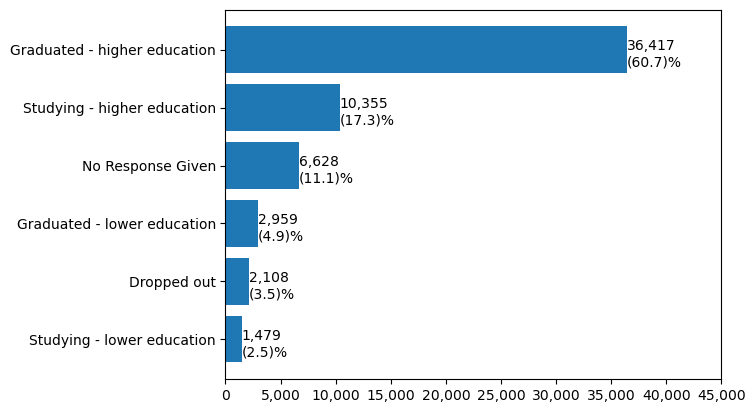

In [19]:
ax=plt.subplot()
bars=plt.barh(education.groupby("education_group")["count"].sum().sort_values().index, education.groupby("education_group")["count"].sum().sort_values().values)

ax.xaxis.set_major_formatter(lambda x,p: format(x,",.0f"))

for i in bars:
    val=i.get_width()
    ax.annotate(format(val,","), xy=(val, i.get_y()+i.get_height()/2))
    
    ax.annotate("({:.1f})%".format((val/education.groupby("education_group")["count"].sum().sum())*100), xy=(val, i.get_y()+i.get_height()/7))



ax.set_xlim(0,45000)
plt.show()



* Most of the members have graduated in higher ducation, which includes university, masters, phd, medical school
* There are about 3.5% members that dropped out of their education whereas 11% chose not to disclose their education qualifications. 

# 6. Is there a relation between Dropped Out and Drugs comsuming pattern? 

In [20]:
dropped_out=data[data.education.str.contains("dropp")]
dropped_out.head(2)

dropped_out.groupby("education").size()

education
dropped out of college/university    995
dropped out of high school           102
dropped out of law school             18
dropped out of masters program       140
dropped out of med school             12
dropped out of ph.d program          127
dropped out of space camp            523
dropped out of two-year college      191
dtype: int64

In [21]:
drop={'dropped out of college/university': 'Dropped out - higher education',
      'dropped out of space camp': 'Dropped out - higher education',
      'dropped out of two-year college': 'Dropped out - lower education',
      'dropped out of masters program': 'Dropped out - higher education',
      'dropped out of ph.d program': 'Dropped out - higher education',
      'dropped out of high school': 'Dropped out - lower education',
      'dropped out of law school': 'Dropped out - higher education',
      'dropped out of med school': 'Dropped out - higher education'}

dropped_out["Final_ed"]=dropped_out["education"].map(drop)
dropped_out.head()

fin_df=dropped_out[["Final_ed","drugs"]].groupby("Final_ed").drugs.value_counts().to_frame().rename(columns={"drugs":"count"}).reset_index()
fin_df

C:\Users\SANDEEP RAWAT\AppData\Local\Temp\ipykernel_1180\2866351143.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_out["Final_ed"]=dropped_out["education"].map(drop)


,Final_ed,drugs,count
0,Dropped out - higher education,never,817
1,Dropped out - higher education,sometimes,501
2,Dropped out - higher education,No Response Given,454
3,Dropped out - higher education,often,43
4,Dropped out - lower education,never,139
5,Dropped out - lower education,sometimes,87
6,Dropped out - lower education,No Response Given,48
7,Dropped out - lower education,often,19


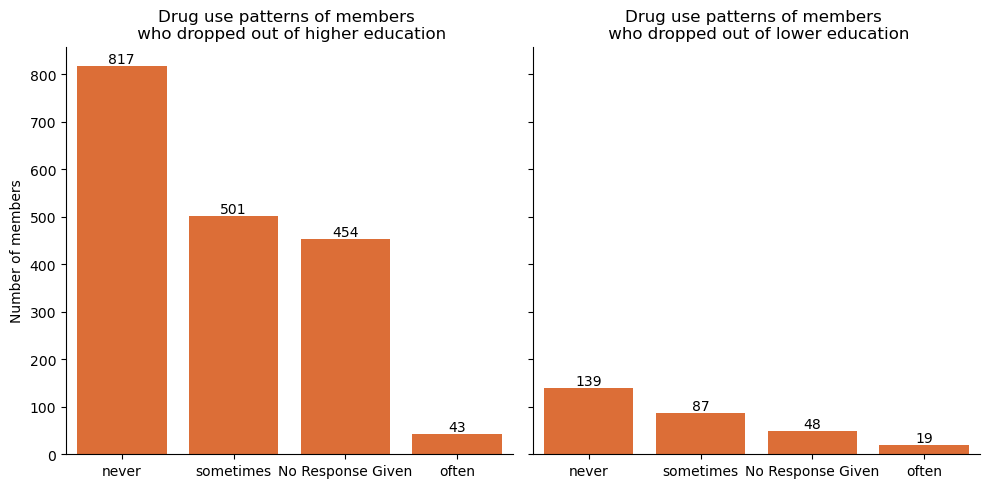

In [22]:
ax=sns.catplot(data=fin_df, x="drugs", y="count", col="Final_ed", kind="bar", color="#F8651B")
ax.axes[0,0].set_title("Drug use patterns of members \n who dropped out of higher education")
ax.axes[0,1].set_title("Drug use patterns of members \n who dropped out of lower education")
ax.set_axis_labels("", "Number of members")

for axes in ax.axes.flat:
    for bar in axes.containers[0]:
        axes.annotate(format(bar.get_height(),".0f"),
                      xy=(bar.get_x()+(bar.get_width()/2), bar.get_height()), ha="center",va='bottom')

* The pattern between higher and lower education dropouts is similar to all members – the majority of them never take drugs
* But the numbers are a lot higher for the higher education group

# 7. Profession of the members

In [23]:
job_dictionary = {'student': 'Student',
                  'science / tech / engineering': 'Science / Tech / Engineering',
                  'computer / hardware / software': 'Computer / Hardware / Software', 
                  'artistic / musical / writer': 'Artistic / Musical / Writer',
                  'sales / marketing / biz dev': 'Sales / Marketing / Biz dev',
                  'medicine / health': 'Medicine / Health', 
                  'education / academia': 'Education, Academia',
                  'executive / management': 'Executive / Management',
                  'banking / financial / real estate': 'Banking / Financial / Real Estate',
                  'entertainment / media': 'Entertainment / Media',
                  'law / legal services': 'Law / Legal Services',
                  'hospitality / travel': 'Hospitality / Travel',
                  'construction / craftsmanship': 'Construction / Craftsmanship',
                  'clerical / administrative': 'Clerical / Administrative',
                  'political / government': 'Political / Government',
                  'transportation': 'Transportation',
                  'unemployed': 'Unemployed',
                  'retired': 'Retired',
                  'military': 'Military'}

job=data.copy()
job["Cat"]=job.job.map(job_dictionary)
job=job[["Cat"]].value_counts().to_frame().reset_index().rename(columns={0:"Value"})
job.head()

,Cat,Value
0,Student,4882
1,Science / Tech / Engineering,4848
2,Computer / Hardware / Software,4709
3,Artistic / Musical / Writer,4438
4,Sales / Marketing / Biz dev,4391


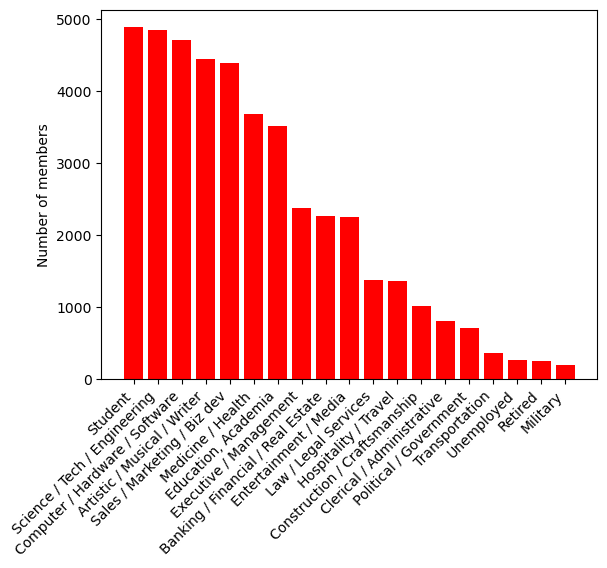

In [24]:
plt.bar(job.Cat, job.Value, color="red")
plt.xticks(rotation=45,ha="right")
plt.ylabel("Number of members")
plt.show()

* The majority of members are students which justifies the younger age range of most members
* There are also a high proportion of members in science, tech and computer fields – all of these jobs would require a high level of education and the education data back up the fact that most members are highly educated

# 8. Gender distribution of the members

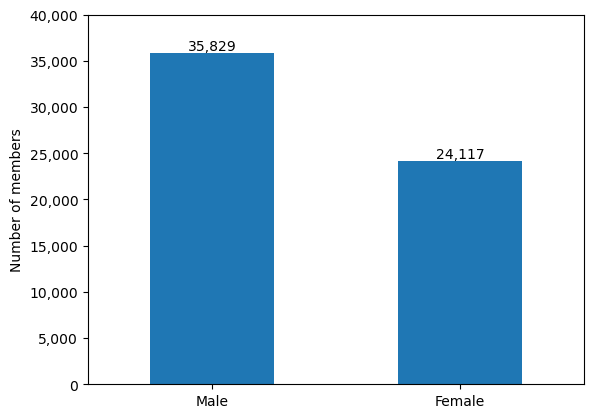

In [25]:
ax = plt.subplot()
gr=data.sex.value_counts().plot(kind="bar")
plt.xticks(ticks=[0, 1],labels=["Male","Female"], rotation=0)
ax.yaxis.set_major_formatter(tcr.FuncFormatter(lambda x,p: format(x,",.0f")))
ax.set_ylim((0,40000))
plt.ylabel("Number of members")

for bar in gr.patches:
    yval=bar.get_height()
    ax.annotate("{:,}".format(yval),
               xy=(bar.get_x() + bar.get_width()/2,yval), ha="center", va="bottom")
    
plt.show()

* The majority of members (60%) are male
* There are 11,712 more male members than female

# 9. Relationship Status of the members 

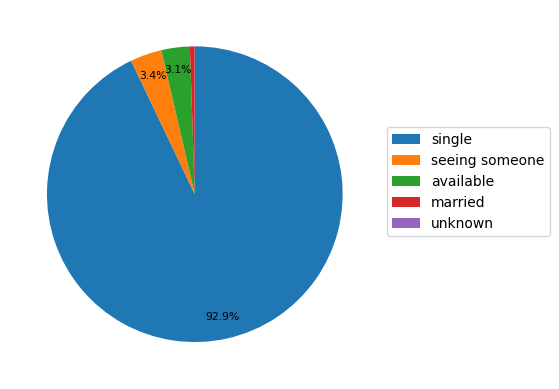

In [26]:
stat=pd.DataFrame(data.status.value_counts()).reset_index().rename(columns={"index":"status", "status":"count"})

plt.pie(stat["count"], counterclock=False, startangle=-270, autopct=lambda x: "%.1f%%" % x if x>2 else "",pctdistance=0.85, textprops={'fontsize': 7.8})
plt.legend(labels=stat["status"], bbox_to_anchor=(1,0.7))
plt.show()

* The majority of members are single, as one would expect on a dating site
* However, over 2,000 people admit they are currently seeing someone else and just over 300 members admit they are married

# 9.1 Distribution of the non-single members

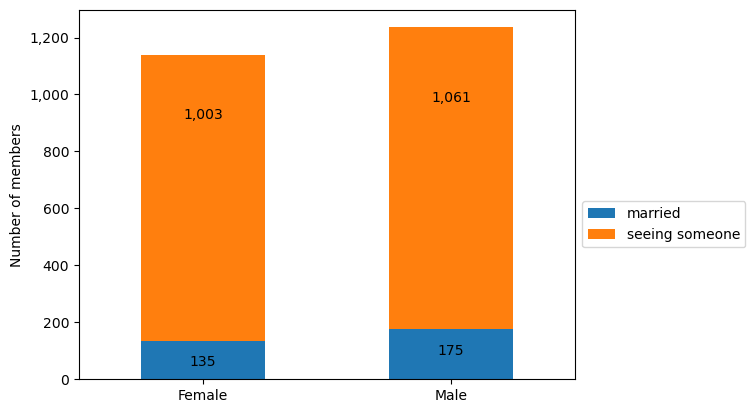

In [27]:
attached=data[data.status.isin(["married","seeing someone"])].groupby(["sex","status"]).sex.count().to_frame().rename(columns={"sex":"count"}).reset_index()

gr=attached.pivot_table(index="sex", columns="status",values="count").plot(kind="bar", stacked=True)
gr.yaxis.set_major_formatter(tcr.FuncFormatter(lambda x,p: format(x,",.0f")))
plt.xticks(ticks=[0,1], labels=["Female","Male"], rotation=0)
plt.xlabel("")
plt.ylabel("Number of members")
plt.legend(bbox_to_anchor=(1,0.5))
        
for bar in gr.patches:        
    height = bar.get_height()
    gr.annotate('{:,.0f}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, -20),
                 textcoords="offset points",
                 ha='center', va='bottom')

* There are more men on the OkCupid dating site who are not single but there isn’t a huge difference in the numbers
* There are 175 married men on the site compared to 135 married women
* There are 1,061 male members who are seeing other people compared to 1,003 women

# 10. Sexual orientation of members

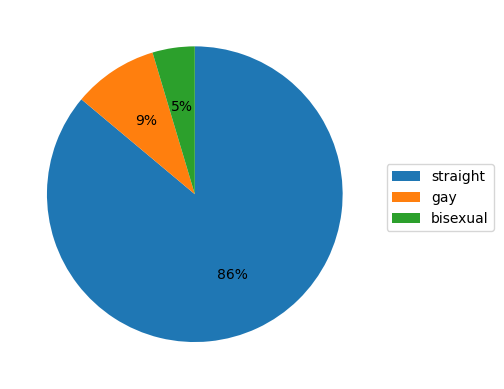

In [47]:
ori=data.orientation.value_counts().to_frame().rename(columns={"orientation":"value"}).reset_index()

plt.pie(ori.value,counterclock=False, startangle=-270, autopct="%.0f%%")
plt.legend(labels=ori["index"], bbox_to_anchor=(1,0.6))
plt.show()

* Whilst 86% of members are straight, there are 14% who are gay or bisexual